In [1]:
#Simulation with multiple time steps:Assume 252 trading days per year
import numpy as np
S0 = 100         # initial stock price
mu = 0.08        # expected annual return
sigma = 0.25     # annual volatility
T = 1.0          # total time horizon in years
N = 252          # number of time steps (daily)
M = 10000        # number of simulation paths
dt = T / N       # time increment
# Monte Carlo simulation
np.random.seed(42)
Z = np.random.standard_normal((252,10000)) # Generate standard normal random variables
print(Z)

[[ 0.49671415 -0.1382643   0.64768854 ... -0.70531672  0.49576557
   0.64438845]
 [-0.67849473 -0.30549946 -0.59738106 ...  0.37835397  1.71352973
  -1.6199198 ]
 [ 0.34828625  0.28332359 -0.93651985 ... -0.50136732 -1.89235682
  -0.22888421]
 ...
 [ 0.52645688  0.36089942 -0.3664628  ... -0.81501891 -1.062242
   0.86949055]
 [-0.46463728  1.05482048  0.31750494 ...  1.53309638  0.37461667
  -0.63376902]
 [ 0.95296607 -0.06650581 -1.7408697  ...  1.34091624  1.382514
   0.18734769]]


In [3]:
import pandas as pd
# --- Simulate GBM paths ---
np.random.seed(42)
# standard normal random numbers (N x M)
Z = np.random.normal(0, 1, (N, M))
# distribution can be changed
# pre-allocate array
S = np.zeros((N + 1, M))
S[0] = S0

# iterate over time steps using exact solution
for t in range(1, N + 1):
    S[t] = S[t-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z[t-1])
pd.DataFrame(S)

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,100.804818,99.801796,101.044779,102.447360,99.651198,99.651224,102.538045,101.235511,99.282578,100.877626,...,102.303216,100.321367,101.067824,97.686400,101.918222,102.089928,96.920656,98.914510,100.803312,101.039528
2,99.752719,99.342003,100.117987,102.645518,101.567470,98.467546,104.187149,100.016270,97.985028,102.206294,...,104.329107,99.602917,102.512338,99.103891,103.478731,102.735244,99.065139,99.524905,103.580617,98.513532
3,100.320771,99.805555,98.671289,103.606754,99.230970,97.477153,100.977687,102.521485,97.647258,105.774760,...,103.990774,102.526797,103.957634,97.218386,101.463323,101.825163,101.364348,98.761275,100.558722,98.178061
4,97.258768,98.180030,97.782208,103.871342,100.863958,98.567648,99.138752,101.942805,97.783694,105.359257,...,107.050819,104.163690,104.237641,96.326271,99.933708,103.656604,101.808009,99.744110,101.876818,98.749101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,159.866410,127.364100,108.362301,109.394452,122.486818,146.067606,94.072643,137.526722,156.645945,161.140038,...,45.419015,137.968589,86.954187,115.679956,108.948855,181.385954,83.314253,97.390818,66.343111,83.285366
249,159.061572,129.620732,106.492154,111.389016,122.693422,145.616753,92.351359,140.818059,152.429653,157.486822,...,45.409497,139.552066,86.529148,115.161000,106.391737,177.812855,84.279096,96.183715,67.128074,84.568086
250,160.416850,130.384766,105.899816,108.610279,123.077677,145.078179,91.020961,144.873605,153.081996,158.878291,...,45.252418,139.000523,86.621510,116.174904,107.794890,174.380386,86.926215,94.975425,66.027219,85.750645
251,159.278118,132.594438,106.451257,107.846957,122.749070,145.022504,89.914272,144.783451,153.832456,162.983457,...,45.350419,146.223370,88.008292,116.658392,106.354934,176.282180,87.929339,97.315242,66.430758,84.915457


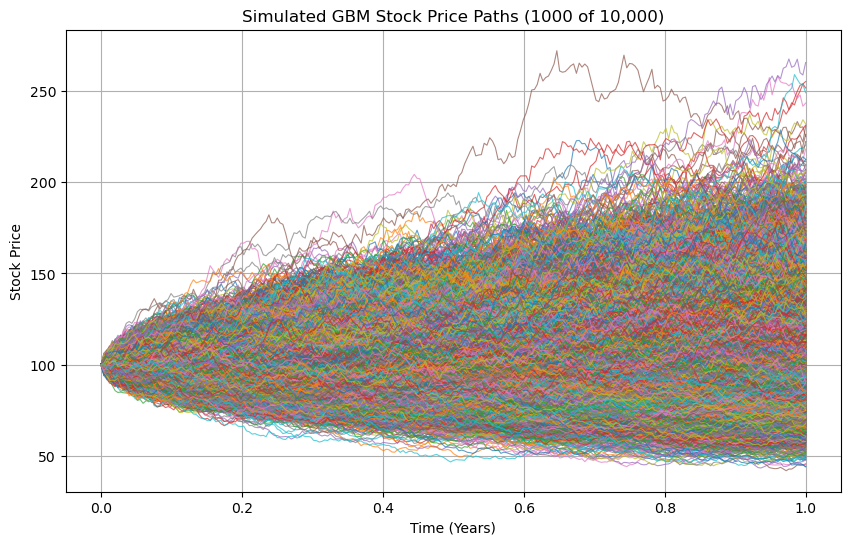

In [5]:
import matplotlib.pyplot as plt
# --- Plot sample of paths ---
plt.figure(figsize=(10, 6))
for i in range(10000):  # plot only 20 paths for clarity
    plt.plot(np.linspace(0, T, N+1), S[:, i], lw=0.8, alpha=0.7)
plt.title("Simulated GBM Stock Price Paths (1000 of 10,000)")
plt.xlabel("Time (Years)")
plt.ylabel("Stock Price")
plt.grid(True)
plt.show()